<h1>App Store Mobile Games Rating Prediction</h1>
    

Pada Notebook ini, saya ingin melakukan prediksi rata-rata rating aplikasi Strategy Mobile Games yang terdapat pada App Store, yang akan saya bandingkan dengan jumlah user, harga, pembelian dalam aplikasi (in-app purchases), ukuran aplikasi, serta genre.

<h2>Menyiapkan Dataset untuk EDA</h2>

Pertama, import library yang digunakan untuk mengolah dataset. Selanjutnya, menggunakan fungsi dari pandas, import CSV dari dataset yang ingin diprediksi.

In [384]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# save Dataset to variable df
df = pd.read_csv('appstore_games.csv')
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


Setelah dipastikan bahwa import CSV berhasil, saya ingin melakukan pembersihan dataset. Saya ingin mengetahui kolom apa saja yang ada di dataset, serta jumlah row yang memiliki data kosong (NaN).

In [385]:
df.isna().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

Selanjutnya saya menghilangkan beberapa kolom yang tidak berkaitan dengan penelitian saya. Sebagian besar kolom yang saya drop adalah kolom yang bersifat deskriptif. Saya hanya akan menyisakan kolom rata-rata rating, jumlah user rating, harga, pembelian dalam aplikasi (in-app purchases), ukuran aplikasi, serta genre.

In [386]:
df = df.drop(['URL', 'ID', 'Name', 'Age Rating', 'Subtitle', 'Icon URL', 'Description', 'Developer', 'Languages', 'Primary Genre', 'Original Release Date', 'Current Version Release Date'], axis=1)
df_filter = df.dropna()
print(df_filter.head())

    Average User Rating  User Rating Count  Price  \
5                   3.0               47.0    0.0   
15                  3.0              112.0    0.0   
16                  3.0              112.0    0.0   
18                  3.5            95971.0    0.0   
19                  3.5              357.0    0.0   

                            In-app Purchases         Size  \
5                                       1.99   48672768.0   
15                                      0.99  122826752.0   
16                                      0.99  122826752.0   
18  1.99, 0.99, 1.99, 0.99, 4.99, 1.99, 1.99   26820692.0   
19                          0.99, 0.99, 0.99   52236288.0   

                                    Genres  
5   Games, Entertainment, Strategy, Puzzle  
15                  Games, Strategy, Board  
16                  Games, Strategy, Board  
18                 Games, Puzzle, Strategy  
19  Games, Strategy, Puzzle, Entertainment  


Oke, dataframe kita sekarang berisikan angka yang dapat dijadikan nilai untuk prediksi, KECUALI In-app Purchases dan Genres. Oleh karena itu, dua variabel ini harus dijadikan value yang dapat dijadikan nilai prediksi dengan cara encoding.

<h3> Genres encoding </h3>

Saya melakukan encoding dengan metode One-Hot Encoding, karena dalam satu row dapat memiliki banyak value yang dapat di-grouping. Saya memulai One-Hot Encoding pada variabel Genres.

Waktunya melakukan string splitting dari label-label value yang ada di Genres.

In [387]:
genres = df_filter['Genres'].str.split(', ')
genres

5        [Games, Entertainment, Strategy, Puzzle]
15                       [Games, Strategy, Board]
16                       [Games, Strategy, Board]
18                      [Games, Puzzle, Strategy]
19       [Games, Strategy, Puzzle, Entertainment]
                           ...                   
16828                   [Games, Puzzle, Strategy]
16842                   [Games, Action, Strategy]
16856               [Games, Simulation, Strategy]
16863                    [Games, Board, Strategy]
16932         [Utilities, Games, Board, Strategy]
Name: Genres, Length: 4634, dtype: object

Menggunakan fungsi MultiLabelBinarizer dari library sklearn, saya mengumpulkan grouping label-label yang ada di Genres. Inti dari encoding adalah mengubah setiap label yang berformat string menjadi biner. Setiap label akan menjadi kolom baru dengan value biner dalam sebuah DataFrame baru.

In [388]:
from sklearn.preprocessing import MultiLabelBinarizer


# Convert labels string to binaries

mlb = MultiLabelBinarizer()
expandedLabelData = mlb.fit_transform(df_filter['Genres'].str.split(', '))
labelClasses = mlb.classes_

# Create a DataFrame from our output
df_Labels = pd.DataFrame(expandedLabelData, columns=labelClasses)
df_Labels.head()

,Action,Adventure,Board,Books,Business,Card,Casino,Casual,Education,Entertainment,...,Reference,Role Playing,Simulation,Social Networking,Sports,Strategy,Travel,Trivia,Utilities,Word
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


DataFrame yang baru ini kemudian akan digabungkan ke dalam DataFrame utama dengan metode concatenate. 

In [389]:
df = pd.concat([df_filter.reset_index(drop=True),df_Labels.reset_index(drop=True)], axis=1)
df.head()

,Average User Rating,User Rating Count,Price,In-app Purchases,Size,Genres,Action,Adventure,Board,Books,...,Reference,Role Playing,Simulation,Social Networking,Sports,Strategy,Travel,Trivia,Utilities,Word
0,3.0,47.0,0.0,1.99,48672768.0,"Games, Entertainment, Strategy, Puzzle",0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.0,112.0,0.0,0.99,122826752.0,"Games, Strategy, Board",0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,3.0,112.0,0.0,0.99,122826752.0,"Games, Strategy, Board",0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,3.5,95971.0,0.0,"1.99, 0.99, 1.99, 0.99, 4.99, 1.99, 1.99",26820692.0,"Games, Puzzle, Strategy",0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3.5,357.0,0.0,"0.99, 0.99, 0.99",52236288.0,"Games, Strategy, Puzzle, Entertainment",0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Dibawah ini adalah visualisasi dari Genres.

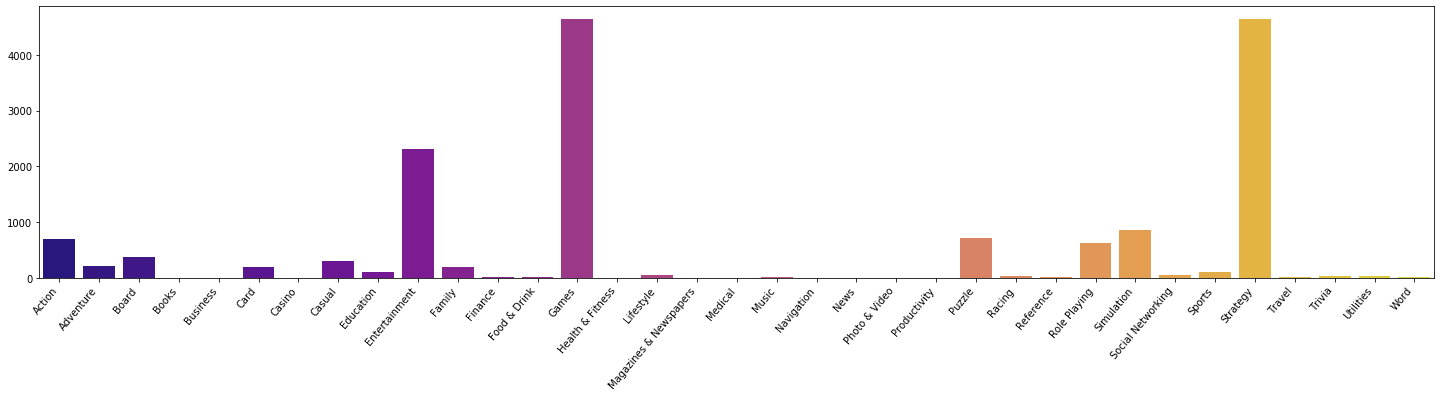

In [390]:
categories = list(df_Labels.columns.values)
plt.figure(figsize=(25,5))
ax = sns.barplot(categories, df_Labels.sum().values, palette='plasma')
ax.set_xticklabels(ax.get_xticklabels(), rotation='50', ha="right");

Dapat dilihat bahwa genre Games, Strategy dan Entertainment mendominasi Genres. Namun jika dipertimbangkan lagi, DataSet yang kita gunakan berisikan aplikasi mobile games strategi, jadi tentu saja umum. Saya akan menghilangkan 3 genre teratas untuk visualisasi, sehingga dapat memberikan kesempatan bagi Genres yang lain.

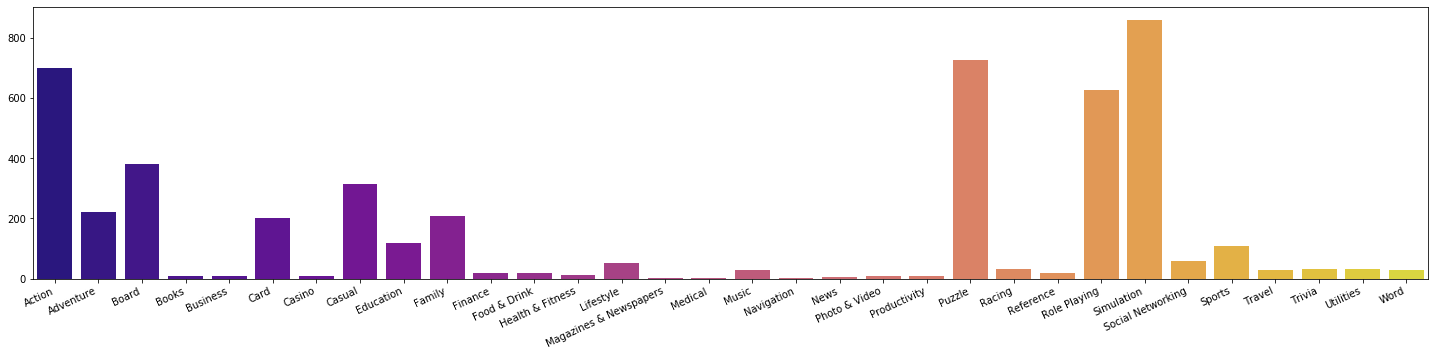

In [391]:
df_Labels_dropped = df_Labels.drop(["Strategy", "Games", "Entertainment"], axis=1)
categories = list(df_Labels_dropped.columns.values)
plt.figure(figsize=(25,5))
ax = sns.barplot(categories, df_Labels_dropped.sum().values, palette='plasma')
ax.set_xticklabels(ax.get_xticklabels(), rotation='25', ha="right");

<h3> In-App Purchases encoding </h3>

Usai melakukan encoding kolom Genres, selanjutnya adalah melakukan encoding pada kolom in-app purchases, karena satu row IAP bisa memiliki lebih dari satu label harga.

In [392]:
mlb_inapp = MultiLabelBinarizer()
df_Label_Data = mlb_inapp.fit_transform(df['In-app Purchases'].str.split(', '))
labelClasses = mlb_inapp.classes_

# Create a pandas.DataFrame from our output
df_Labels = pd.DataFrame(df_Label_Data, columns=labelClasses)
df_Labels.head()

,0,0.0,0.99,1.49,1.99,10.99,109.99,11.99,119.99,12.99,...,74.99,79.99,8.49,8.99,84.99,89.99,9.49,9.99,94.99,99.99
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dibawah ini adalah visualisasi dari In-Game Purchases.

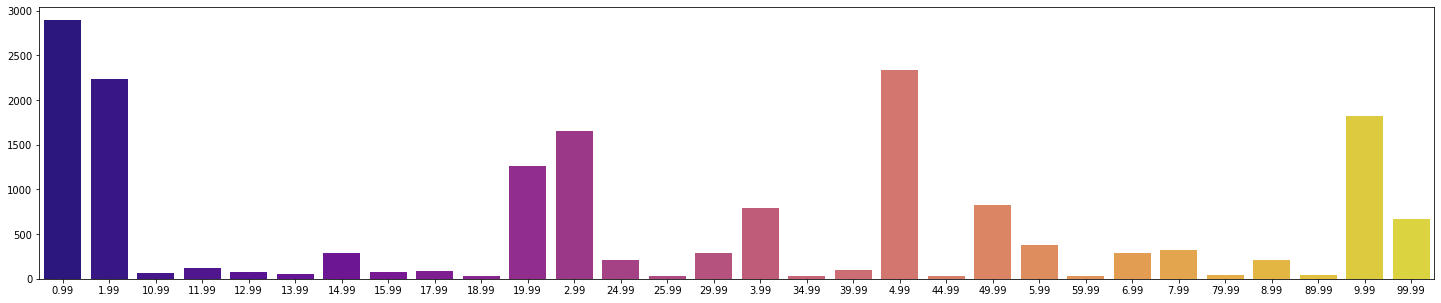

In [393]:
df_prices = df_Labels.sum().sort_values(ascending=False)[:30]
plt.figure(figsize=(25,5))
sns.barplot(df_prices.index, df_prices.values, palette='plasma')
plt.show()

In [394]:
df = pd.concat([df.reset_index(drop=True),df_Labels.reset_index(drop=True)], axis=1)

y = df['Average User Rating']

In [395]:
print(df.head())

   Average User Rating  User Rating Count  Price  \
0                  3.0               47.0    0.0   
1                  3.0              112.0    0.0   
2                  3.0              112.0    0.0   
3                  3.5            95971.0    0.0   
4                  3.5              357.0    0.0   

                           In-app Purchases         Size  \
0                                      1.99   48672768.0   
1                                      0.99  122826752.0   
2                                      0.99  122826752.0   
3  1.99, 0.99, 1.99, 0.99, 4.99, 1.99, 1.99   26820692.0   
4                          0.99, 0.99, 0.99   52236288.0   

                                   Genres  Action  Adventure  Board  Books  \
0  Games, Entertainment, Strategy, Puzzle       0          0      0      0   
1                  Games, Strategy, Board       0          0      1      0   
2                  Games, Strategy, Board       0          0      1      0   
3             

Dibawah ini visualisasi dari dependent variable kita, yakni Average User Rating.

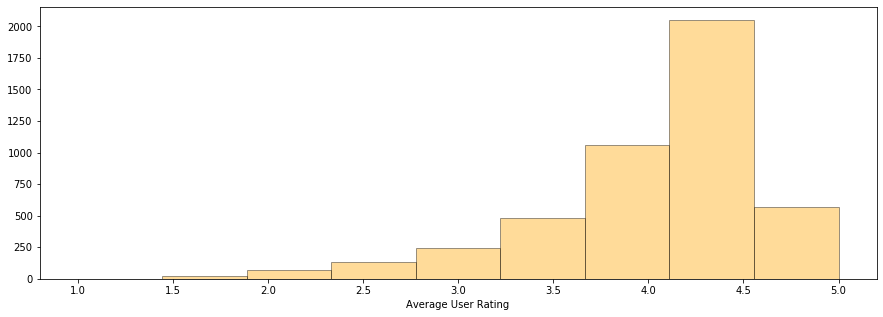

In [396]:
plt.figure(figsize=(15,5))
sns.distplot(y, hist=True, kde=False, bins=9, color='orange',  hist_kws={'edgecolor':'#000000'})

Dan dibawah adalah visualisasi dari independent variable selain Genres dan In-App Purchases yang telah divisualisasikan diatas.

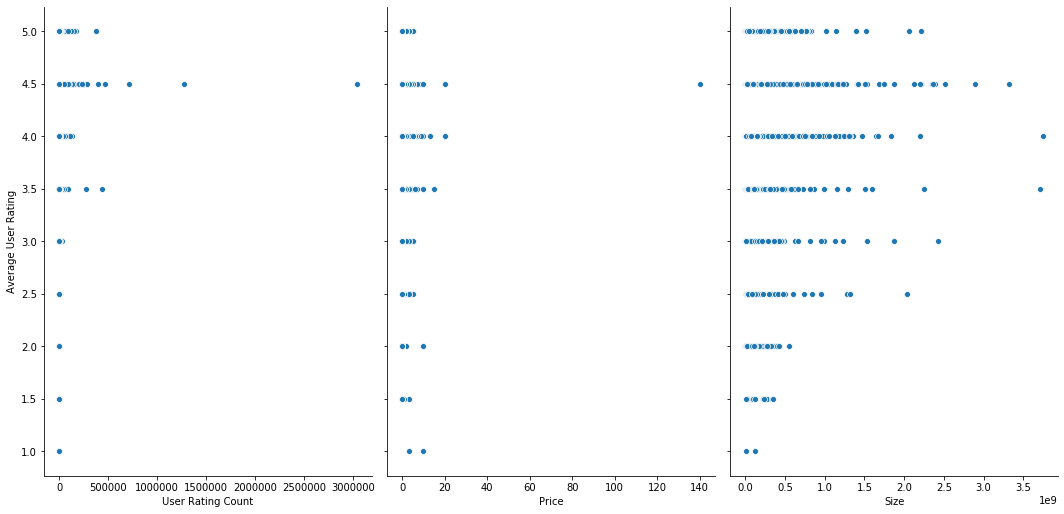

In [397]:
sns.pairplot(df, x_vars=['User Rating Count','Price','Size'], y_vars=['Average User Rating'], height=7, aspect=0.7)

Sebelum masuk ke bagian prediksi rating, ada baiknya untuk menghapus kolom yang telah kita encode, yakni In-App Purchases dan Genres. Juga jangan lupa menghapus kolom Average User Rating karena telah disimpan di variabel y, serta untuk menjaga agar df hanya berisikan variable independent.

In [398]:
df = df.drop(['Average User Rating', 'In-app Purchases', 'Genres'], axis=1)
df.head()

,User Rating Count,Price,Size,Action,Adventure,Board,Books,Business,Card,Casino,...,74.99,79.99,8.49,8.99,84.99,89.99,9.49,9.99,94.99,99.99
0,47.0,0.0,48672768.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,112.0,0.0,122826752.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,112.0,0.0,122826752.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95971.0,0.0,26820692.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,357.0,0.0,52236288.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2> Average User Rating Prediction dengan Linear Regression menggunakan SKLearn</h2>

Pertama saya menyiapkan DataFrame baru untuk menyimpan data-data training dan testing. Menggunakan Train Test Split, saya memisahkan dependent dan independent variable, serta memisahkan variable untuk train dan test. Lalu mengisi semua data yang kosong (NaN) dengan value 0.

In [399]:
from sklearn.model_selection import train_test_split

# Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=200)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

Selanjutnya, saya melakukan normalisasi data menggunakan library preprocessing dari sklearn. Kemudian, menggunakan kelas dari library LinearRegression sklearn untuk membuat model. Kemudian memasukkan model tersebut (fitting) ke dalam train data dan label, sehingga dapat memprediksi train dan test data, dimana kita bisa menghitung nilai RMSE (root mean squared error).

In [400]:
# import libraries from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

# normalization
X_train_preprocessed = preprocessing.normalize(X_train)
X_test_preprocessed = preprocessing.normalize(X_test)

# fitting
linReg = LinearRegression()
linReg.fit(X_train_preprocessed, y_train)

# predicting
y_train_predict = linReg.predict(X_train_preprocessed)

# model evaluation for training set
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
print('RMSE for training set is {:.3f}'.format(rmse))

# model evaluation for testing set
y_test_predict = linReg.predict(X_test_preprocessed)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
print('RMSE for testing set is {:.3f}'.format(rmse))

RMSE for training set is 0.643
RMSE for testing set is 0.660


Saya membuat dataFrame baru yang akan menyimpan perbandingan antara trained value dengan test value.

In [401]:
df_error = pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': y_test_predict.flatten()})
df_error.head(10)

,Actual,Predicted
0,4.5,4.200222
1,4.5,3.850316
2,4.5,4.162707
3,4.5,3.812081
4,4.5,4.206765
5,5.0,4.192438
6,4.0,4.216507
7,3.5,3.854514
8,3.5,4.183214
9,4.5,4.312100


Dibawah ini adalah visualisasi dari dataFrame tersebut yang merupakan hasil Linear Regression, dimana saya menunjukkan perbandingan antara rating sesungguhnya dengan rating hasil prediksi.

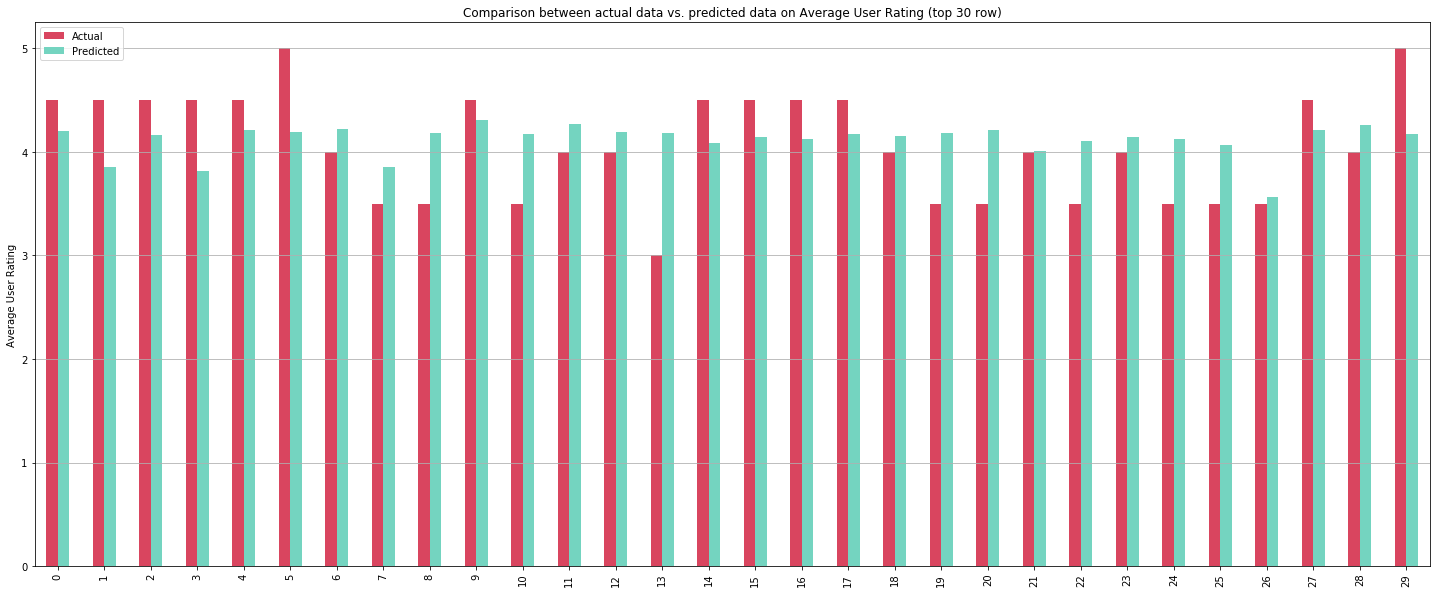

In [402]:
df_linreg = df_error[0:30]
fig, ax = plt.subplots()
df_linreg.plot(kind='bar',ax=ax, figsize=(25,10), color=['#d9455f', '#74d4c0'])
ax.grid(axis='y')
plt.ylabel('Average User Rating')
plt.title("Comparison between actual data vs. predicted data on Average User Rating (top 30 row)")
plt.show(fig)

Visualisasi tersebut menggambarkan akurasi dari value prediksi yang dapat dinilai dari RMSE 0.65. Mayoritas prediksi yang dihasilkan dari Linear Regression kita terletak di angka 4 sampai 4.5, karena memang mayoritas average user rating yang ada di dataset kita memiliki value tersebut.

Mungkin, dengan menggunakan algoritma lain, kita dapat menekan angka RMSE.

<h2> Average User Rating Prediction dengan XGBoost Regressor</h2>

Pertama saya mengimport library dari XGBoost. Saya bisa langsung membuat regressor dengan random parameter, namun saya ingin mengetahui parameter yang paling efektif yang dapat menghasilkan angka RMSE yang jauh lebih baik dari sebelumnya. Beberapa parameter dari xgb regressor adalah 'learning_rate', 'max_depth', 'n_estimators' dan 'num_boost_rounds'.

Untuk itu saya menggunakan GridSearchCV untuk mencari parameter-parameter tersebut.

In [403]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

params = {'learning_rate': [0.001, 0.01, 0.05, 0.1],
          'max_depth' : [2, 4, 6, 8],
          'n_estimators' : [100, 200, 300, 400, 500],
          'num_boost_rounds' : [5, 10, 20]}

GridSearchCV akan beriterasi melalui semua kombinasi parameter untuk menemukan mana value yang terbaik.

In [404]:
"""
%%time
xgr_opt = xgb.XGBRegressor(objective="reg:squarederror",
                                 min_child_weight=1.5,
                                 tree_method='gpu_hist')

grid = GridSearchCV(estimator=xgr_opt, scoring="neg_mean_squared_error", param_grid = params, verbose=1, cv=3)
grid.fit(X_train, y_train)

# printing the best parameters
print(grid.best_params_)
"""

'\n%%time\nxgr_opt = xgb.XGBRegressor(objective="reg:squarederror",\n                                 min_child_weight=1.5,\n                                 tree_method=\'gpu_hist\')\n\ngrid = GridSearchCV(estimator=xgr_opt, scoring="neg_mean_squared_error", param_grid = params, verbose=1, cv=3)\ngrid.fit(X_train, y_train)\n\n# printing the best parameters\nprint(grid.best_params_)\n'

Saya tidak dapat menggunakan GridSearchCV karena akses Amazon SageMaker Studio saya tidak mengijinkan penggunaan GPU, dan untuk menggunakan CPU sangat memakan waktu; oleh karena itu saya menggunakan parameter random terlebih dahulu.

In [405]:
xgr_best = xgb.XGBRegressor(learning_rate = 0.01, max_depth  = 6, n_estimators =  500, num_boost_rounds =  5,  min_child_weight=1.5)
xgr_best.fit(X_train, y_train)

# saving prediction of fitted XGBregressor
train_pred = xgr_best.predict(data= X_train)
test_pred = xgr_best.predict(data= X_test)

# looking for mean squared error
mse_train = mean_squared_error(y_train, train_pred)
mse_test = mean_squared_error(y_test, test_pred)

# prints out square root of MSE
print('RMSE for training set is {:.3f}'.format(np.sqrt(mse_train)))
print('RMSE for testing set is {:.3f}'.format(np.sqrt(mse_test)))

RMSE for training set is 0.527
RMSE for testing set is 0.598


Dapat dilihat bahwa angka RMSE dari XGBoost Regressor lebih rendah beberapa poin daripada angka RMSE dari Linear Regression. Beberapa poin ini menjadi selisih yang cukup besar apabila diterapkan. Saya percaya apabila GridSearchCV dijalankan maka kita dapat menemukan angka RMSE yang lebih rendah lagi.

Sama seperti sebelumnya, saya membuat dataFrame baru yang akan menyimpan perbandingan antara trained value dengan test value.

In [406]:
df_error = pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': test_pred.flatten()})
df_error.head(10)

,Actual,Predicted
0,4.5,4.465631
1,4.5,4.070120
2,4.5,4.427217
3,4.5,3.308061
4,4.5,4.371673
5,5.0,3.876403
6,4.0,4.047969
7,3.5,3.791021
8,3.5,3.657448
9,4.5,4.067966


Dibawah ini adalah visualisasi dari dataFrame tersebut yang merupakan hasil XGBoost Regressor, dimana saya menunjukkan perbandingan antara rating sesungguhnya dengan rating hasil prediksi.

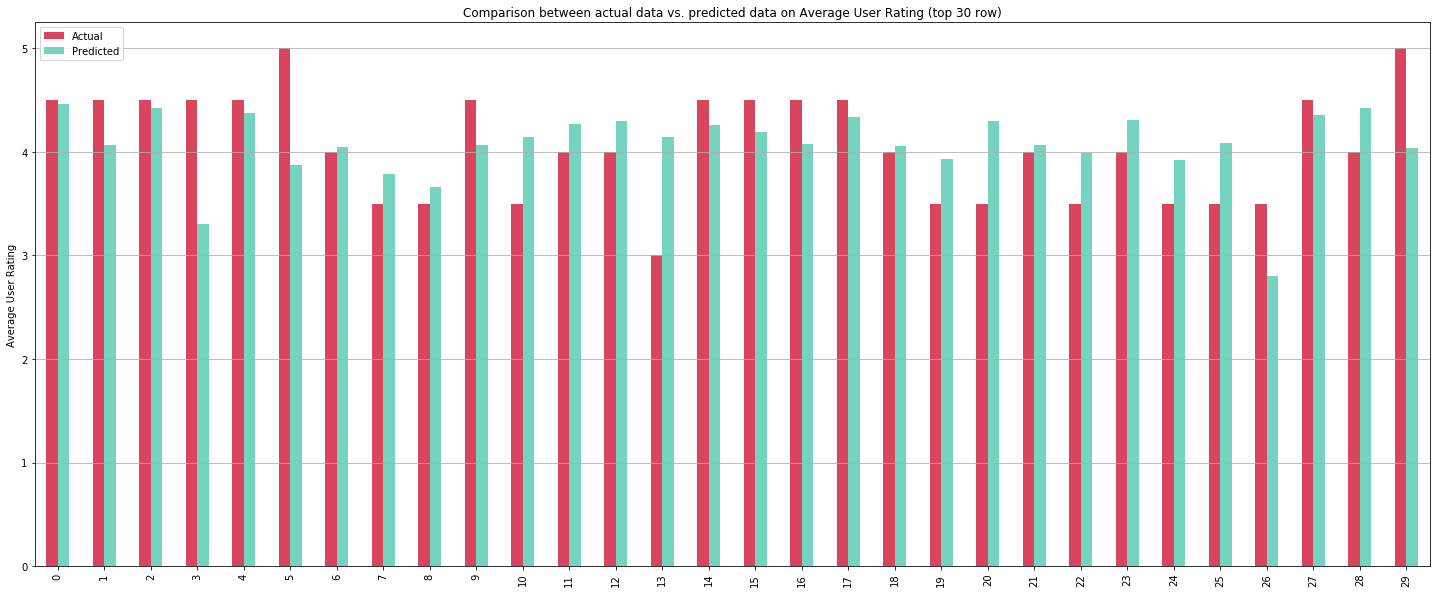

In [407]:
df_linreg = df_error[0:30]
fig, ax = plt.subplots()
df_linreg.plot(kind='bar',ax=ax, figsize=(25,10), color=['#d9455f', '#74d4c0'])
ax.grid(axis='y')
plt.ylabel('Average User Rating')
plt.title("Comparison between actual data vs. predicted data on Average User Rating (top 30 row)")
plt.show(fig)

<h2> Menyimpan model dari Machine Learning </h2>

Selanjutnya saya akan menyimpan model dari XGB Regressor yang telah saya jalankan. Nantinya model ini dapat di-load dan digunakan tanpa harus melakukan training lagi. 

In [410]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(xgr_best, 'MachineLearningModel.pkl') 

['MachineLearningModel.pkl']